In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [2]:
df=pd.read_csv(r'''C:\Users\kenny\Desktop\DataScience Related Affair\President and VP analysis\President and VP data Cleaned.csv''')

The above data is the cleaned version of the original data set. All the cleaning was done in Excel using Power Query

In [3]:
df.head(10)

,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,HIGHEST QUALIFICATION
0,PRESIDENT,OSITELU ISAAC BABATUNDE,A,64,M,MSc
1,VICE-,LAWAL NAFIU MUHAMMAD,A,33,M,BSc
2,PRESIDENT,ABDULRASHID HASSAN BABA,AA,46,M,SSCE
3,VICE-,UCHENDU UJU PEACE OZOKA,AA,49,F,LLB
4,PRESIDENT,OMOYELE SOWORE,AAC,47,M,SSCE
5,VICE-,RUFAI RABIU AHMED,AAC,42,M,MPH
6,PRESIDENT,CHIKE UKAEGBU,AAP,35,M,BSc
7,VICE-,SAFIYA IBRAHIM OGOH,AAP,47,F,BA
8,PRESIDENT,SHIPI MOSES GODIA,ABP,39,M,SSCE
9,VICE-,OKWUANYASI ABIOLA KIKA SHALIAT,ABP,44,F,BSc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
POSITION                 144 non-null object
NAME OF CANDIDATE        144 non-null object
PARTY                    144 non-null object
AGE                      144 non-null int64
GENDER                   144 non-null object
HIGHEST QUALIFICATION    144 non-null object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


In [5]:
df.describe()

,AGE
count,144.000000
mean,49.888889
std,9.844320
min,30.000000
25%,42.000000
50%,48.500000
75%,57.000000
max,76.000000


In [6]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
POSITION,144,2,PRESIDENT,72
NAME OF CANDIDATE,144,144,IYAN TAMA HAMISU LAMIDO,1
PARTY,144,72,NUP,2
GENDER,144,2,M,116
HIGHEST QUALIFICATION,144,17,SSCE,26


In [7]:
columns=['POSITION', 'PARTY', 'GENDER', 'HIGHEST QUALIFICATION']
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
        
count_unique(df, columns)


For column POSITION
PRESIDENT    72
VICE-        72
Name: POSITION, dtype: int64

For column PARTY
NUP      2
GDPN     2
PPN      2
APC      2
NRM      2
CNP      2
NIP      2
AGAP     2
NDLP     2
ANDP     2
ANN      2
AAC      2
KP       2
AA       2
FJP      2
BNPP     2
UP       2
PPA      2
PT       2
ACD      2
NPC      2
WTPN     2
APGA     2
AGA      2
ANP      2
ABP      2
ASD      2
LP       2
A        2
AAP      2
        ..
HDP      2
DPP      2
UDP      2
FRESH    2
ACPN     2
DA       2
SNC      2
PPC      2
APP      2
CAP      2
PDP      2
PCP      2
APA      2
MPN      2
NDCP     2
LM       2
YES      2
NNPP     2
NCMP     2
AUN      2
C4C      2
ADP      2
YPP      2
NCP      2
ADC      2
MMN      2
MAJA     2
GPN      2
DPC      2
RBNP     2
Name: PARTY, Length: 72, dtype: int64

For column GENDER
M    116
F     28
Name: GENDER, dtype: int64

For column HIGHEST QUALIFICATION
SSCE     26
BSc      23
PhD      17
HND      13
OND      12
LLB      12
BA       11
MBA      

In [8]:
qualification= {'SSCE': 'Secondary School Certificate', 'BSc': 'Bachelors', 'PhD':'Doctorate', 'HND':'Higher National Diploma',
               'OND':'Ordinary National Diploma', 'LLB':'Bachelors','BA':'Bachelors', 'MBA':'Masters', 'MSc':'Masters',
               'NCE':'College of Education', 'PGD':'Post Graduate Diploma', 'MA':'Masters','LLM':'Masters', 'BPHIL':'Bachelors',
               'B.ENG':'Bachelors', 'Btech':'Bachelors','MPH':'Masters'}

df['Qualification_new']=df['HIGHEST QUALIFICATION'].map({k:v for k,v in qualification.items()})

In [9]:
df['Qualification_new'].value_counts()

Bachelors                       49
Secondary School Certificate    26
Masters                         18
Doctorate                       17
Higher National Diploma         13
Ordinary National Diploma       12
College of Education             5
Post Graduate Diploma            4
Name: Qualification_new, dtype: int64

In [10]:
df.head(10)

,POSITION,NAME OF CANDIDATE,PARTY,AGE,GENDER,HIGHEST QUALIFICATION,Qualification_new
0,PRESIDENT,OSITELU ISAAC BABATUNDE,A,64,M,MSc,Masters
1,VICE-,LAWAL NAFIU MUHAMMAD,A,33,M,BSc,Bachelors
2,PRESIDENT,ABDULRASHID HASSAN BABA,AA,46,M,SSCE,Secondary School Certificate
3,VICE-,UCHENDU UJU PEACE OZOKA,AA,49,F,LLB,Bachelors
4,PRESIDENT,OMOYELE SOWORE,AAC,47,M,SSCE,Secondary School Certificate
5,VICE-,RUFAI RABIU AHMED,AAC,42,M,MPH,Masters
6,PRESIDENT,CHIKE UKAEGBU,AAP,35,M,BSc,Bachelors
7,VICE-,SAFIYA IBRAHIM OGOH,AAP,47,F,BA,Bachelors
8,PRESIDENT,SHIPI MOSES GODIA,ABP,39,M,SSCE,Secondary School Certificate
9,VICE-,OKWUANYASI ABIOLA KIKA SHALIAT,ABP,44,F,BSc,Bachelors


In [11]:
df.to_csv('Presidential data.csv')

C:\Users\kenny\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


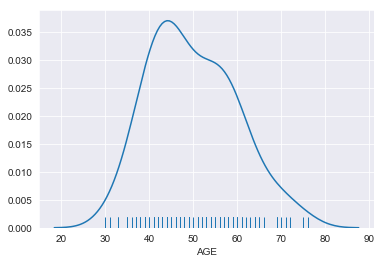

In [12]:
sns.distplot(df['AGE'], bins = 10, rug=True, hist = False)

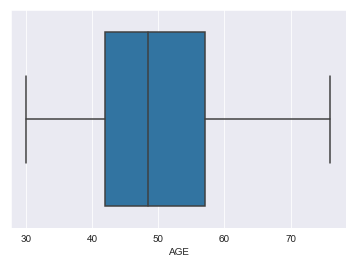

In [13]:
sns.boxplot(df['AGE'])

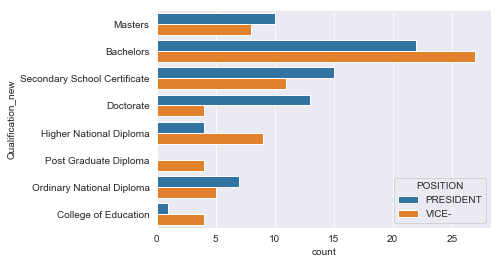

In [14]:
sns.countplot(data=df, y='Qualification_new', hue='POSITION')

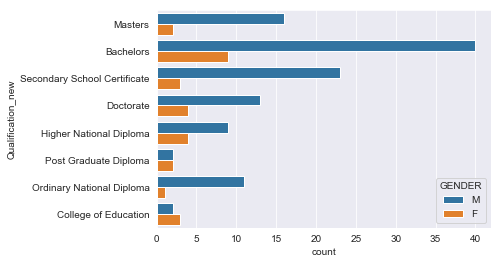

In [15]:
sns.countplot(data=df, y='Qualification_new', hue='GENDER')

In [16]:
president=df[df['POSITION']=='PRESIDENT']
vice= df[df['POSITION']=='VICE-']

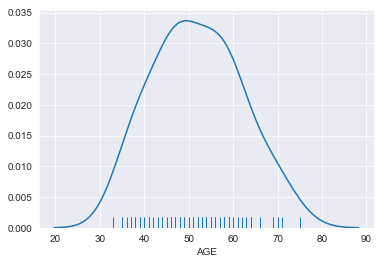

In [17]:
sns.distplot(president['AGE'], bins = 10, rug=True, hist = False)

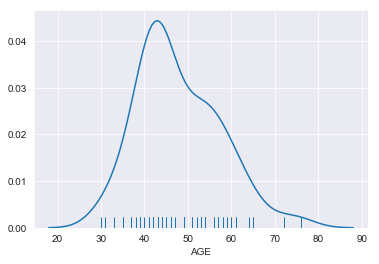

In [18]:
sns.distplot(vice['AGE'], bins = 10, rug=True, hist = False)

Other Visualizations were done using Power BI